In [1]:
from tools import *

In [2]:
import datetime

print(fetch_stock_price("GOOG",
                        datetime.date(2017,1,1),
                        datetime.date(2017,1,31)))

loaded from ./tmp/prices/GOOG_2017-01-01_2017-01-31.pk
[786.14, 786.9, 794.02, 806.15, 806.65, 804.79, 807.91, 806.36, 807.88, 804.61, 806.07, 802.175, 805.02, 819.31, 823.87, 835.67, 832.15, 823.31, 802.32, 796.79]


## visualization

C:\Users\inp032\.conda\envs\yyc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


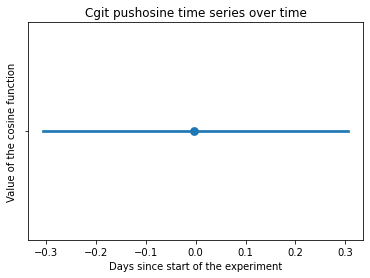

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from tools import fetch_cosine_values, fetch_stock_price, format_dataset

np.set_printoptions(precision=2)

# # Print 2 oscillations (20 points, with a frequency of 0.1, i.e. a period of 10)
cos_values = fetch_cosine_values(20, frequency=0.1)
seaborn.pointplot(cos_values)
plt.xlabel("Days since start of the experiment")
plt.ylabel("Value of the cosine function")
plt.title("Cgit push"
          "osine time series over time")
plt.show()

In [4]:
# Format the feature and label set
features_size = 5
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, features_size)
print("minibatch_cos_X.shape=", minibatch_cos_X.shape)
print("minibatch_cos_y.shape=", minibatch_cos_y.shape)

minibatch_cos_X.shape= (15, 5)
minibatch_cos_y.shape= (15,)


In [5]:
minibatch_cos_X

array([[ 1.  ,  0.82,  0.21, -0.37, -0.77],
       [ 0.82,  0.21, -0.37, -0.77, -0.93],
       [ 0.21, -0.37, -0.77, -0.93, -0.85],
       [-0.37, -0.77, -0.93, -0.85, -0.23],
       [-0.77, -0.93, -0.85, -0.23,  0.35],
       [-0.93, -0.85, -0.23,  0.35,  0.75],
       [-0.85, -0.23,  0.35,  0.75,  1.01],
       [-0.23,  0.35,  0.75,  1.01,  0.78],
       [ 0.35,  0.75,  1.01,  0.78,  0.25],
       [ 0.75,  1.01,  0.78,  0.25, -0.25],
       [ 1.01,  0.78,  0.25, -0.25, -0.72],
       [ 0.78,  0.25, -0.25, -0.72, -1.05],
       [ 0.25, -0.25, -0.72, -1.05, -0.89],
       [-0.25, -0.72, -1.05, -0.89, -0.29],
       [-0.72, -1.05, -0.89, -0.29,  0.35]])

Observation 0: X=[ 1.    0.82  0.21 -0.37 -0.77] y=-0.9332206274727847
Observation 1: X=[ 0.82  0.21 -0.37 -0.77 -0.93] y=-0.8476237504404999
Observation 2: X=[ 0.21 -0.37 -0.77 -0.93 -0.85] y=-0.23029437843826808
Observation 3: X=[-0.37 -0.77 -0.93 -0.85 -0.23] y=0.35332576672860816
Observation 4: X=[-0.77 -0.93 -0.85 -0.23  0.35] y=0.7470047852159067


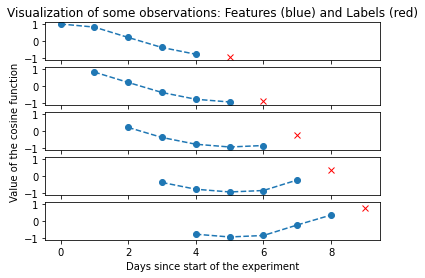

In [6]:
# Print some features of the experiment
samples_to_plot = 5
f, axarr = plt.subplots(samples_to_plot, sharex=True)
for i in range(samples_to_plot):
    feats = minibatch_cos_X[i, :]
    label = minibatch_cos_y[i]

    print("Observation {}: X={} y={}".format(
        i, feats, label
    ))
    # plt.subplot(samples_to_plot, 1, i+1)
    axarr[i].plot(range(i, features_size + i), feats, '--o')
    axarr[i].plot([features_size + i], label, 'rx')
    axarr[i].set_ylim([-1.1, 1.1])

plt.xlabel("Days since start of the experiment")
axarr[2].set_ylabel("Value of the cosine function")
axarr[0].set_title("Visualization of some observations: Features (blue) and Labels (red)")
plt.show()